In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from nltk.probability import SimpleGoodTuringProbDist as GT
import numpy as np
import sys
sys.path.append('../Classes')
from GDNN import *
from fileReader import *

In [3]:
fd = ReadAndProcess('../corpus/movies_refined.txt', 3, False)

Loading file...
16.292023420333862
Pre-processing...
249.72815823554993


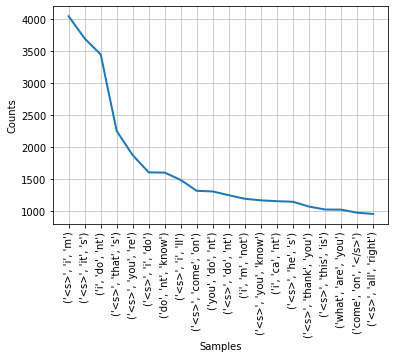

In [4]:
fd.plot(20)

In [7]:
fd2 = ReadAndProcess('../corpus/movies_refined.txt', 2, False)

Loading file...
3.4705307483673096
Pre-processing...
6.191618204116821


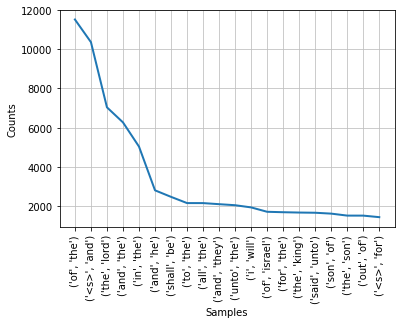

In [6]:
fd2.plot(20)

In [11]:
net = Net()
net.loadModel('save/28_07')

Net(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


# Good Turing formula
For unseen ngrams, $r = 0$:
$$ C_0\cdot q_0 = \frac{C_1}{N_\sum} $$

where $ C_0\cdot q_0 $ is the probability of occurence of any unseen n-gram. $C_1$ is the number of n-grams occuring one time in training set

In [8]:
gtfd = GT(fd)
gtfd2 = GT(fd2)

In [9]:
print("Probability of unseen tri-gram:")

print(gtfd.prob(('new','trigram','prob')))
print(fd.r_Nr()[1]/fd.N())


print("Probability unseen biram:")

print(gtfd2.prob(('new','bigram')))
print(fd2.r_Nr()[1]/fd2.N())

Probability of unseen tri-gram:
0.45864587716000665
0.45864587716000665
Probability unseen biram:
0.11293458721093759
0.11293458721093759


In [10]:
print('trigrams occuring once account for {:.2f} % of all trigrams'.format(
    fd.r_Nr()[1]/len(list(fd))*100))

print('bigrams occuring once account for {:.2f} % of all bigrams'.format(
    fd2.r_Nr()[1]/len(list(fd2))*100))

trigrams occuring once account for 83.65 % of all trigrams
bigrams occuring once account for 60.05 % of all bigrams


In [16]:
print(list(fd.elements())[-1])
print(fd.freq(('shut', 'off', 'this'))*fd.N())

('shut', 'off', 'this')
1.0


In [17]:
print(fd.freq(('shut', 'off', 'this')))
print(gtfd.prob(('shut', 'off', 'this')))
prob = net(torch.Tensor([1,0]))/len(list(fd))

print(prob)

6.223906272950655e-07
1.252360009627866e-07
tensor([1.2551e-07], grad_fn=<DivBackward0>)


409149


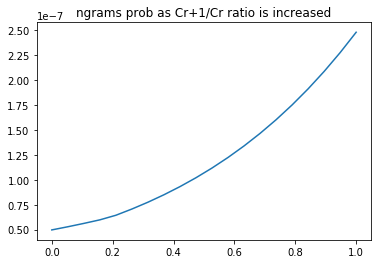

In [111]:
x = torch.Tensor(20,2)
y = np.zeros(20)
total = len(list(fd))
print(total)
for i in range (20):
    x[i] = torch.Tensor([(i/20), 0])
    y[i] = net(x[i])/total

axis = np.linspace(0, 1 ,20)

plt.plot(axis,y)
plt.title("ngrams prob as Cr+1/Cr ratio is increased")
plt.show()

for r = 0

In [20]:
P= []
Pgt = []
Pnn = []

for r in range(10):
    P.append(r/fd.N())
    if r != 0:
        C = fd.r_Nr()[r+1]/fd.r_Nr()[r]
        
        Pgt.append((r+1)*C/fd.N())
        temp = net(torch.Tensor([C,r/10]))/fd.N()
        Pnn.append(temp[0])

    else:
        Pgt.append(fd.r_Nr()[r+1]/fd.N())
        temp = (net(torch.Tensor([1,0]))/fd.N())
        Pnn.append(temp[0])
    
for r in range(3):
    print('      |                |                  |')
    print('r = {} | P = {:.4E} | Pgt = {:.4E} | Pnn = {:.4e}'.format(r,
                                                                    P[r],
                                                                     Pgt[r],
                                                                     Pnn[r]
                                                                    ))
    print('      |                |                  |')


      |                |                  |
r = 0 | P = 0.0000E+00 | Pgt = 4.5865E-01 | Pnn = 6.8820e-08
      |                |                  |
      |                |                  |
r = 1 | P = 6.2239E-07 | Pgt = 1.2513E-07 | Pnn = 1.9593e-08
      |                |                  |
      |                |                  |
r = 2 | P = 1.2448E-06 | Pgt = 6.1922E-07 | Pnn = 4.2480e-08
      |                |                  |


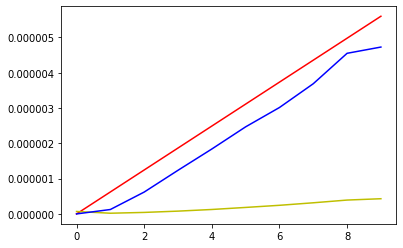

In [18]:
axis = np.arange(0,10)
Pgt[0] = 0
plt.plot(axis, P , 'r' , axis , Pnn , 'y' , axis , Pgt, 'b')
plt.show()

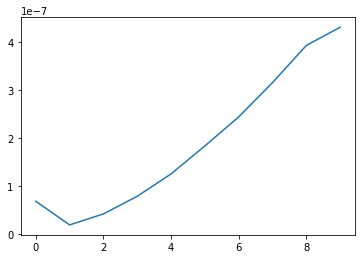

In [19]:
plt.plot(Pnn)
plt.show()